In [1]:
import os
import json
import random
import shutil
import datetime as dt
import calendar
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
date_df_cd=pd.read_csv('time_compare_cd')
date_df_nyt=pd.read_csv('time_compare_nyt')
date_df_dt=pd.read_csv('time_compare_dt')
date_df_g=pd.read_csv('time_compare_g')
date_df_ht=pd.read_csv('time_compare_ht')

In [9]:
%run functions.ipynb

ERROR:root:File `'functions.ipynb.py'` not found.


Text(0.1, 0.25, '# Articles Published')

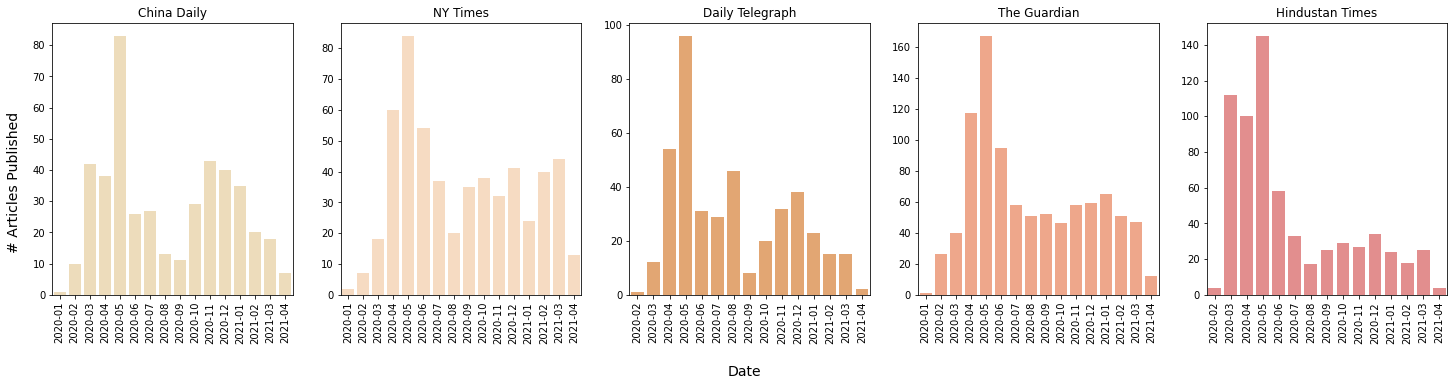

In [3]:
plt.rcParams['figure.figsize'] = [25,5]
fig, axs = plt.subplots(ncols=5)
sn.barplot(x='date', y='article', data=date_df_cd.sort_values('date'), ax=axs[0], color='wheat')
sn.barplot(x='date', y='article', data=date_df_nyt.sort_values('date'), ax=axs[1], color='peachpuff')
sn.barplot(x='date',y='article', data=date_df_dt.sort_values('date'), ax=axs[2], color='sandybrown')
sn.barplot(x='date',y='article', data=date_df_g.sort_values('date'), ax=axs[3], color='lightsalmon')
sn.barplot(x='date',y='article', data=date_df_ht.sort_values('date'), ax=axs[4], color='lightcoral')

axs[0].set_title('China Daily'); axs[1].set_title('NY Times'); axs[2].set_title('Daily Telegraph'); axs[3].set_title('The Guardian'); axs[4].set_title('Hindustan Times')
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set(xlabel=None, ylabel=None)


fig.text(0.5, -.1,'Date', fontsize=14)
fig.text(0.1, .25,'# Articles Published', fontsize=14, rotation=90) 

In [4]:
characters_to_remove = '!,.()[]|"'

cd_comp_toks = tokenize(cd_doc, lowercase=True, strip_chars=characters_to_remove)
nyt_comp_toks = tokenize(nyt_doc, lowercase=True, strip_chars=characters_to_remove)
cd_dist = Counter(cd_comp_toks)
nyt_dist= Counter(nyt_comp_toks)

dt_comp_toks = tokenize(dt_doc, lowercase=True, strip_chars=characters_to_remove)
ht_comp_toks = tokenize(ht_doc, lowercase=True, strip_chars=characters_to_remove)
dt_dist= Counter(dt_comp_toks)
ht_dist= Counter(ht_comp_toks)

NameError: name 'tokenize' is not defined

In [ ]:
g_comp_toks = tokenize(g_doc, lowercase=True, strip_chars=characters_to_remove)
g_dist= Counter(g_comp_toks)

In [ ]:
origin_terms=origin_terms = ['laboratory','market','military','conspiracy','army','transparency','origins','wuhan','theory','detrick','bioweapon','cold-chain']
origin_compare = compare_item(cd_dist, cd_comp_toks, nyt_dist, nyt_comp_toks, dt_dist, dt_comp_toks, g_dist, g_comp_toks, ht_dist, ht_comp_toks, origin_terms, 100000)
origin_df = pd.DataFrame(origin_compare, columns=['word','China Daily','NY Times','The Guardian','Daily Telegraph','Hindustan Times'])
origin_df

In [ ]:
compare_plot(origin_compare, 'China Daily', 'New York Times', 'Daily Telegraph', 'The Guardian', 'Hindustan Times')